In [1]:
import os
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import MultipleLocator
import calendar
import netCDF4 as nc
from cartopy import crs as ccrs
import rtree
import geopandas as gpd
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LatitudeFormatter, LongitudeFormatter

In [5]:
# surface
sfile = '/mnt/iusers01/fatpou01/sees01/a16404ys/scratch/Projects/inputdata/lnd/clm2/surfdata_map/release-clm5.0.18/surfdata_0.9x1.25_hist_16pfts_Irrig_CMIP6_simyr1850_c190214.nc'
# case1
path_1 = '/mnt/iusers01/fatpou01/sees01/a16404ys/scratch/Projects/archive/csf3/project1/RCase1/lnd_hist/'

In [6]:
# drawing
linewidth=1
fontsize = 9
start_year = 2015
end_year = 2099
labelcolor = '#6b6b6b'
lc1 = '#6e1913'
lc2 = '#a42018'
lc3 = '#f62d18'
lc4 = '#d97c26'
lc5 = '#ff912b'
lc6 = '#30b5d6'
lc7 = '#28ac92'
lc8 = '#123264'
lc9 = '#05101f'
minor_locator = MultipleLocator(10)
specific_years = [2015, 2050, 2100]
alpha=0.075

In [7]:
ds_0 = xr.open_dataset(sfile)
mask = np.any(ds_0['PCT_URBAN'] != 0, axis=0)
mask = mask.rename({'lsmlat': 'lat', 'lsmlon': 'lon'})
mask
# xarray.DataArray'PCT_URBAN'(lat: 192lon: 288)

<xarray.DataArray 'PCT_URBAN' (lat: 192, lon: 288)>
array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])
Dimensions without coordinates: lat, lon

In [8]:
Arr_TBOT_1 = [] # atmospheric air temperature (K) (downscaled to columns in glacier regions)
Arr_TBOT_1_JJA = [] # JJA: June, July, August
Arr_TBOT_1_DJF = [] # DJF: December, January, February

Arr_FSDS_1 = []
Arr_FSDS_1_JJA = []
Arr_FSDS_1_DJF = []

Arr_FLDS_1 = []
Arr_FLDS_1_JJA = []
Arr_FLDS_1_DJF = []

Arr_QBOT_1 = []
Arr_QBOT_1_JJA = []
Arr_QBOT_1_DJF = []

Arr_PBOT_1 = []
Arr_PBOT_1_JJA = []
Arr_PBOT_1_DJF = []

Arr_RAIN_1 = []
Arr_RAIN_1_JJA = []
Arr_RAIN_1_DJF = []

Arr_SNOW_1 = []
Arr_SNOW_1_JJA = []
Arr_SNOW_1_DJF = []
time = []

for year in range(start_year,end_year):
        fn = 'RCase1.clm2.h1.' + '%04.0f' % year + '-02-01-00000.nc'
        year_1 = year+1
        fn_1 = 'RCase1.clm2.h1.' + '%04.0f' % year_1 + '-02-01-00000.nc'
        #print(path_1+fn)
        if(os.path.exists(path_1+fn)):
           #print(fn)
            ds_1 = xr.open_dataset(path_1+fn)   # 打开第一个文件
            ds_1_1 = xr.open_dataset(path_1+fn_1)
            time.append(year)
            TBOT_1 = ds_1['TBOT']- 273.15
            TBOT_1_1 = ds_1_1['TBOT']- 273.15
            FSDS_1 = ds_1['FSDS']
            FSDS_1_1 = ds_1_1['FSDS']
            FLDS_1 = ds_1['FLDS']
            FLDS_1_1 = ds_1_1['FLDS']
            QBOT_1 = ds_1['QBOT']
            QBOT_1_1 = ds_1_1['QBOT']
            PBOT_1 = ds_1['PBOT']
            PBOT_1_1 = ds_1_1['PBOT']
            RAIN_1 = ds_1['RAIN']
            RAIN_1_1 = ds_1_1['RAIN']
            SNOW_1 = ds_1['SNOW']
            SNOW_1_1 = ds_1_1['SNOW']
            
            Arr_TBOT_1.append(TBOT_1.mean(dim='time').where(mask).mean().item())
            Arr_TBOT_1_JJA.append(TBOT_1[6:9,:,:].mean(dim='time').where(mask).mean().item())
            Arr_TBOT_1_DJF.append(xr.concat([TBOT_1.isel(time=11), TBOT_1_1.isel(time=slice(0, 2))], dim='time').mean(dim='time').where(mask).mean().item())

            Arr_FSDS_1.append(FSDS_1.mean(dim='time').where(mask).mean().item())
            Arr_FSDS_1_JJA.append(FSDS_1[6:9,:,:].mean(dim='time').where(mask).mean().item())
            Arr_FSDS_1_DJF.append(xr.concat([FSDS_1.isel(time=11), FSDS_1_1.isel(time=slice(0, 2))], dim='time').mean(dim='time').where(mask).mean().item())
            
            Arr_FLDS_1.append(FLDS_1.mean(dim='time').where(mask).mean().item())
            Arr_FLDS_1_JJA.append(FLDS_1[6:9,:,:].mean(dim='time').where(mask).mean().item())
            Arr_FLDS_1_DJF.append(xr.concat([FLDS_1.isel(time=11), FLDS_1_1.isel(time=slice(0, 2))], dim='time').mean(dim='time').where(mask).mean().item())
            
            Arr_QBOT_1.append(QBOT_1.mean(dim='time').where(mask).mean().item())
            Arr_QBOT_1_JJA.append(QBOT_1[6:9,:,:].mean(dim='time').where(mask).mean().item())
            Arr_QBOT_1_DJF.append(xr.concat([QBOT_1.isel(time=11), QBOT_1_1.isel(time=slice(0, 2))], dim='time').mean(dim='time').where(mask).mean().item())
            
            Arr_PBOT_1.append(PBOT_1.mean(dim='time').where(mask).mean().item())
            Arr_PBOT_1_JJA.append(PBOT_1[6:9,:,:].mean(dim='time').where(mask).mean().item())
            Arr_PBOT_1_DJF.append(xr.concat([PBOT_1.isel(time=11), PBOT_1_1.isel(time=slice(0, 2))], dim='time').mean(dim='time').where(mask).mean().item())
            
            Arr_RAIN_1.append(RAIN_1.mean(dim='time').where(mask).mean().item())
            Arr_RAIN_1_JJA.append(RAIN_1[6:9,:,:].mean(dim='time').where(mask).mean().item())
            Arr_RAIN_1_DJF.append(xr.concat([RAIN_1.isel(time=11), RAIN_1_1.isel(time=slice(0, 2))], dim='time').mean(dim='time').where(mask).mean().item())
            
            Arr_SNOW_1.append(SNOW_1.mean(dim='time').where(mask).mean().item())
            Arr_SNOW_1_JJA.append(SNOW_1[6:9,:,:].mean(dim='time').where(mask).mean().item())
            Arr_SNOW_1_DJF.append(xr.concat([SNOW_1.isel(time=11), SNOW_1_1.isel(time=slice(0, 2))], dim='time').mean(dim='time').where(mask).mean().item())

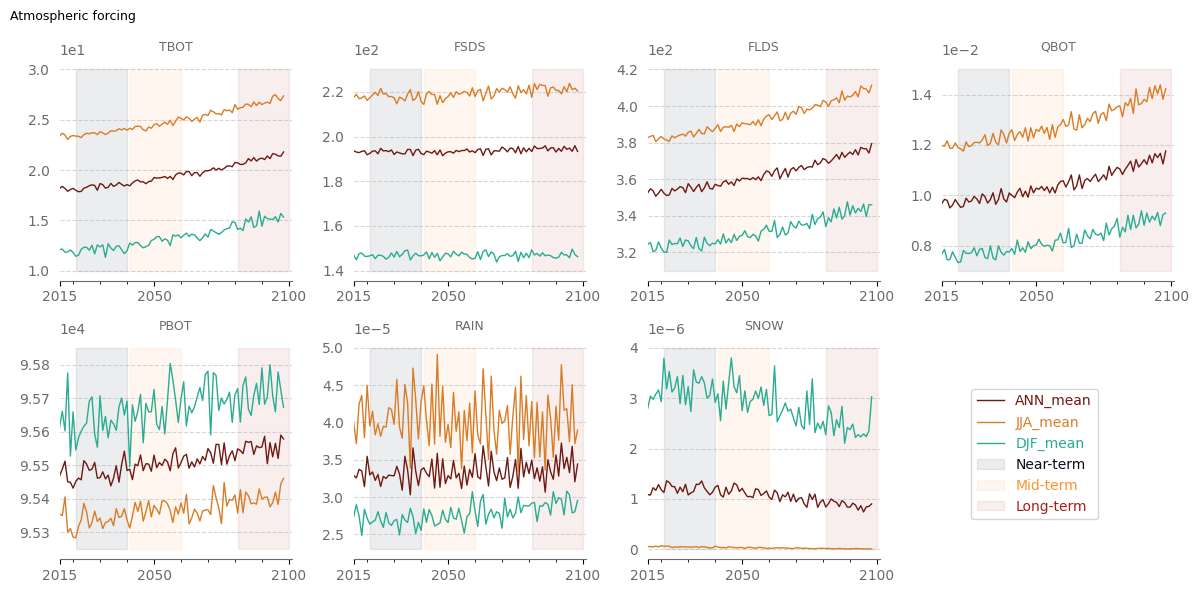

In [9]:
fig_c1_0, axes = plt.subplots(nrows=2, ncols=4, figsize=(12, 6))
#trend_D = np.polyval(Arr_TBOT_1, time)

axes[0,0].plot(time, Arr_TBOT_1, linewidth=linewidth,label='ANN_mean',color=lc1)
#axes[0, 0].plot(time, trend_D, label='Trend_D', linestyle='--', color='black')
axes[0,0].plot(time, Arr_TBOT_1_JJA, linewidth=linewidth,label='JJA_mean',color=lc4)
axes[0,0].plot(time, Arr_TBOT_1_DJF, linewidth=linewidth,label='DJF_mean',color=lc7)
axes[0,0].set_title('TBOT',fontsize=fontsize,color=labelcolor)
axes[0,0].fill_betweenx([10, 30],2021, 2040, color=lc9, alpha=alpha, label='Near-term')
axes[0,0].fill_betweenx([10, 30],2041, 2060, color=lc5, alpha=alpha, label='Mid-term')
axes[0,0].fill_betweenx([10, 30],2081, 2100, color=lc2, alpha=alpha, label='Long-term')

axes[0,1].plot(time, Arr_FSDS_1, linewidth=linewidth,label='ANN_mean',color=lc1)
axes[0,1].plot(time, Arr_FSDS_1_JJA, linewidth=linewidth,label='JJA_mean',color=lc4)
axes[0,1].plot(time, Arr_FSDS_1_DJF, linewidth=linewidth,label='DJF_mean',color=lc7)
axes[0,1].set_title('FSDS',fontsize=fontsize,color=labelcolor)
axes[0,1].fill_betweenx([140, 230],2021, 2040, color=lc9, alpha=alpha, label='Near-term')
axes[0,1].fill_betweenx([140, 230],2041, 2060, color=lc5, alpha=alpha, label='Mid-term')
axes[0,1].fill_betweenx([140, 230],2081, 2100, color=lc2, alpha=alpha, label='Long-term')

axes[0,2].plot(time, Arr_FLDS_1, linewidth=linewidth,label='ANN_mean',color=lc1)
axes[0,2].plot(time, Arr_FLDS_1_JJA, linewidth=linewidth,label='JJA_mean',color=lc4)
axes[0,2].plot(time, Arr_FLDS_1_DJF, linewidth=linewidth,label='DJF_mean',color=lc7)
axes[0,2].set_title('FLDS',fontsize=fontsize,color=labelcolor)
axes[0,2].fill_betweenx([310, 420],2021, 2040, color=lc9, alpha=alpha, label='Near-term')
axes[0,2].fill_betweenx([310, 420],2041, 2060, color=lc5, alpha=alpha, label='Mid-term')
axes[0,2].fill_betweenx([310, 420],2081, 2100, color=lc2, alpha=alpha, label='Long-term')

axes[0,3].plot(time, Arr_QBOT_1, linewidth=linewidth,label='ANN_mean',color=lc1)
axes[0,3].plot(time, Arr_QBOT_1_JJA, linewidth=linewidth,label='JJA_mean',color=lc4)
axes[0,3].plot(time, Arr_QBOT_1_DJF, linewidth=linewidth,label='DJF_mean',color=lc7)
axes[0,3].set_title('QBOT',fontsize=fontsize,color=labelcolor)
axes[0,3].fill_betweenx([0.007, 0.015],2021, 2040, color=lc9, alpha=alpha, label='Near-term')
axes[0,3].fill_betweenx([0.007, 0.015],2041, 2060, color=lc5, alpha=alpha, label='Mid-term')
axes[0,3].fill_betweenx([0.007, 0.015],2081, 2100, color=lc2, alpha=alpha, label='Long-term')

axes[1,0].plot(time, Arr_PBOT_1, linewidth=linewidth,label='ANN_mean',color=lc1)
axes[1,0].plot(time, Arr_PBOT_1_JJA, linewidth=linewidth,label='JJA_mean',color=lc4)
axes[1,0].plot(time, Arr_PBOT_1_DJF, linewidth=linewidth,label='DJF_mean',color=lc7)
axes[1,0].set_title('PBOT',fontsize=fontsize,color=labelcolor)
axes[1,0].fill_betweenx([95250, 95850],2021, 2040, color=lc9, alpha=alpha, label='Near-term')
axes[1,0].fill_betweenx([95250, 95850],2041, 2060, color=lc5, alpha=alpha, label='Mid-term')
axes[1,0].fill_betweenx([95250, 95850],2081, 2100, color=lc2, alpha=alpha, label='Long-term')

axes[1,1].plot(time, Arr_RAIN_1, linewidth=linewidth,label='ANN_mean',color=lc1)
axes[1,1].plot(time, Arr_RAIN_1_JJA, linewidth=linewidth,label='JJA_mean',color=lc4)
axes[1,1].plot(time, Arr_RAIN_1_DJF, linewidth=linewidth,label='DJF_mean',color=lc7)
axes[1,1].set_title('RAIN',fontsize=fontsize,color=labelcolor)
axes[1,1].fill_betweenx([0.000023, 0.00005],2021, 2040, color=lc9, alpha=alpha, label='Near-term')
axes[1,1].fill_betweenx([0.000023, 0.00005],2041, 2060, color=lc5, alpha=alpha, label='Mid-term')
axes[1,1].fill_betweenx([0.000023, 0.00005],2081, 2100, color=lc2, alpha=alpha, label='Long-term')

axes[1,2].plot(time, Arr_SNOW_1, linewidth=linewidth,label='ANN_mean',color=lc1)
axes[1,2].plot(time, Arr_SNOW_1_JJA, linewidth=linewidth,label='JJA_mean',color=lc4)
axes[1,2].plot(time, Arr_SNOW_1_DJF, linewidth=linewidth,label='DJF_mean',color=lc7)
axes[1,2].set_title('SNOW',fontsize=fontsize,color=labelcolor)
axes[1,2].fill_betweenx([0, 0.000004],2021, 2040, color=lc9, alpha=alpha, label='Near-term')
axes[1,2].fill_betweenx([0, 0.000004],2041, 2060, color=lc5, alpha=alpha, label='Mid-term')
axes[1,2].fill_betweenx([0, 0.000004],2081, 2100, color=lc2, alpha=alpha, label='Long-term')

fig_c1_0.delaxes(axes[1, 3])
lines, labels = axes[0, 0].get_legend_handles_labels()
legend = fig_c1_0.legend(lines, labels,bbox_to_anchor=(0.8, 0.12), loc='lower left')

for i, text in enumerate(legend.get_texts()):
    if i == 0:
        text.set_color(lc1)
    elif i == 1:
        text.set_color(lc4)
    elif i == 2:
        text.set_color(lc7)
    elif i == 3:
        text.set_color(lc9)
    elif i == 4:
        text.set_color(lc5)
    elif i == 5:
        text.set_color(lc2)    
        
for i in range(2):
    for j in range(4):
       
        axes[i,j].set_xlim(start_year,2101)
        # axes[i].yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
        axes[i,j].ticklabel_format(style='sci', scilimits=(0,0), axis='y')
        axes[i,j].tick_params(axis='y', which='both', left=False, right=False, labelleft=True, labelcolor=labelcolor)
        axes[i,j].tick_params(axis='x', which='both', top=False, bottom=True, labelbottom=True, labelcolor=labelcolor)
        # Hide the left, top, and right spines
        axes[i,j].spines['left'].set_visible(False)
        axes[i,j].spines['top'].set_visible(False)
        axes[i,j].spines['right'].set_visible(False)
        axes[i,j].spines['bottom'].set_color(labelcolor)
        axes[i,j].xaxis.set_minor_locator(minor_locator)
        axes[i,j].set_xticks(specific_years)
        axes[i,j].grid(True, which='major', axis='y',linestyle='--',linewidth=0.8, alpha=0.5)
    

fig_c1_0.suptitle('Atmospheric forcing',x=0.005,ha='left',fontsize=fontsize)    
fig_c1_0.tight_layout()
fig_c1_0.savefig('/mnt/iusers01/fatpou01/sees01/a16404ys/scratch/output_analysis/project1/'+'atmospheric_forcing.png', dpi=300)

In [10]:
# 2015 TBOT_ANN
print(Arr_TBOT_1[0])
# 2050 TBOT_ANN
print(Arr_TBOT_1[34])
# 2100 TBOT_ANN
print(Arr_TBOT_1[83])

18.17251968383789
18.900875091552734
21.793664932250977


In [12]:
# 2015 TBOT_JJA:
print(Arr_TBOT_1_JJA[0])
# 2050 TBOT_JJA:
print(Arr_TBOT_1_JJA[34])
# 2100 TBOT_JJA: 
print(Arr_TBOT_1_JJA[83])

23.4168643951416
24.155658721923828
27.36347007751465


In [14]:
# 2015 TBOT_DJF:
print(Arr_TBOT_1_DJF[0])
# 2100 TBOT_DJF:
print(Arr_TBOT_1_DJF[83])

12.086994171142578
15.31883430480957
